## Problema del viajero

<p>El problema del viajero (TSP - Traveling Salesman Problem) es un clásico de optimización combinatoria. El objetivo es encontrar la ruta más corta que visite un conjunto de ciudades exactamente una vez y regrese a la ciudad de origen. Es un problema NP-hard, lo que significa que no existe un algoritmo eficiente conocido para resolverlo de manera óptima en todos los casos a medida que aumenta el número de ciudades.  

En Python, el TSP se puede resolver de varias maneras, dependiendo del enfoque que quieras usar:  
Enfoques Comunes:  
Fuerza bruta (backtracking):  
Probar todas las permutaciones posibles y elegir la mínima. Es ineficiente para un número grande de ciudades.  

Programación dinámica (algoritmo de Held-Karp):  
Más eficiente que el enfoque de fuerza bruta, pero sigue siendo exponencial.  

Algoritmos heurísticos/metaheurísticos:  
Algoritmos como Algoritmos Genéticos, Recocido Simulado (Simulated Annealing) o Colonia de Hormigas (Ant Colony Optimization) para obtener soluciones aproximadas en un tiempo razonable.  

Librerías especializadas:  
Puedes usar networkx, scipy, o ortools de Google para resolverlo de manera más sencilla.  <p>



### Fuerza Bruta (Backtracking)

In [1]:
from itertools import permutations
import matplotlib.pyplot as plt

# Matriz de distancias
distancias = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]

n = len(distancias)
ciudades = range(n)

# Calcular la distancia para una ruta dada
def calcular_distancia(ruta):
    distancia_total = sum(distancias[ruta[i]][ruta[i+1]] for i in range(n - 1))
    distancia_total += distancias[ruta[-1]][ruta[0]]  # Regreso al inicio
    return distancia_total

# Probar todas las rutas posibles
mejor_ruta = None
distancia_minima = float('inf')

for perm in permutations(ciudades):
    if perm[0] == 0:  # Fijamos el punto de partida
        distancia = calcular_distancia(perm)
        if distancia < distancia_minima:
            distancia_minima = distancia
            mejor_ruta = perm

print(f"Mejor ruta: {mejor_ruta}")
print(f"Distancia mínima: {distancia_minima}")

Mejor ruta: (0, 1, 3, 2)
Distancia mínima: 80


### Programación Dinámica (Held-Karp)

In [2]:
from functools import lru_cache

# Matriz de distancias
distancias = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]

n = len(distancias)

# Diccionario para rastrear la mejor ruta
ruta_memoria = {}

@lru_cache(None)
def tsp(mask, pos):
    # Si todas las ciudades fueron visitadas, volver al origen
    if mask == (1 << n) - 1:
        return distancias[pos][0]

    mejor = float('inf')
    siguiente_ciudad = None

    for ciudad in range(n):
        # Si no hemos visitado esta ciudad
        if not (mask & (1 << ciudad)):
            costo = distancias[pos][ciudad] + tsp(mask | (1 << ciudad), ciudad)
            if costo < mejor:
                mejor = costo
                siguiente_ciudad = ciudad

    # Guardamos la mejor opción para reconstruir la ruta
    ruta_memoria[(mask, pos)] = siguiente_ciudad
    return mejor

# Calcular la distancia mínima
distancia_minima = tsp(1, 0)  # Empezamos en la ciudad 0

# Reconstruir la ruta
ruta = [0]
mask, pos = 1, 0
while len(ruta) < n:
    siguiente = ruta_memoria[(mask, pos)]
    ruta.append(siguiente)
    mask |= (1 << siguiente)
    pos = siguiente
ruta.append(0)  # Volver a la ciudad inicial

# Mostrar resultados
print(f"Distancia mínima: {distancia_minima}")
print(f"Mejor ruta: {ruta}")


Distancia mínima: 80
Mejor ruta: [0, 1, 3, 2, 0]


### Algoritmo Metaheurístico (Recocido Simulado)

In [3]:
import random
import math

# Matriz de distancias
distancias = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]

n = len(distancias)

# Función para calcular distancia de una ruta
def calcular_distancia(ruta):
    distancia = sum(distancias[ruta[i]][ruta[i+1]] for i in range(n - 1))
    distancia += distancias[ruta[-1]][ruta[0]]  # Regresar al inicio
    return distancia

# Recocido Simulado
def recocido_simulado():
    temperatura = 10000
    enfriamiento = 0.99
    ruta_actual = list(range(n))
    random.shuffle(ruta_actual)
    distancia_actual = calcular_distancia(ruta_actual)

    while temperatura > 1:
        # Generar vecino intercambiando dos ciudades
        i, j = random.sample(range(n), 2)
        nueva_ruta = ruta_actual[:]
        nueva_ruta[i], nueva_ruta[j] = nueva_ruta[j], nueva_ruta[i]
        nueva_distancia = calcular_distancia(nueva_ruta)

        # Aceptar mejor solución o con probabilidad basada en temperatura
        if nueva_distancia < distancia_actual or random.random() < math.exp((distancia_actual - nueva_distancia) / temperatura):
            ruta_actual = nueva_ruta
            distancia_actual = nueva_distancia

        temperatura *= enfriamiento

    return ruta_actual, distancia_actual

mejor_ruta, mejor_distancia = recocido_simulado()
print(f"Mejor ruta: {mejor_ruta}")
print(f"Distancia mínima: {mejor_distancia}")

Mejor ruta: [1, 0, 2, 3]
Distancia mínima: 80


### Enfoque con NetworkX

Mejor ruta aproximada: [0, 2, 3, 1, 0]
Distancia mínima aproximada: 80


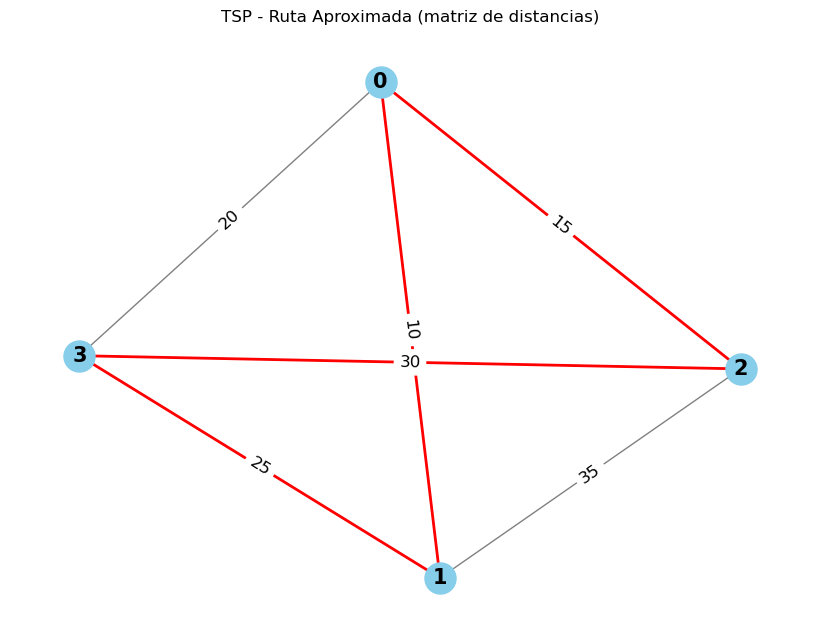

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo completo con 4 ciudades
G = nx.Graph()

# Matriz de distancias
distancias_matriz = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]

# Agregar aristas con pesos
n = len(distancias_matriz)
for i in range(n):
    for j in range(i + 1, n):
        peso = distancias_matriz[i][j]
        if peso != 0:
            G.add_edge(i, j, weight=peso)

# Resolver el TSP usando una heurística aproximada
ruta = nx.approximation.traveling_salesman_problem(G, cycle=True, weight='weight')

# Calcular la distancia total de la ruta
distancia_total = 0
for i in range(len(ruta) - 1):
    u, v = ruta[i], ruta[i + 1]
    if G.has_edge(u, v):
        distancia_total += G[u][v]['weight']
    else:
        print(f"No existe una arista entre {u} y {v}")

print(f"Mejor ruta aproximada: {ruta}")
print(f"Distancia mínima aproximada: {distancia_total}")

# Obtener las posiciones de los nodos para dibujar el grafo
pos = nx.spring_layout(G)  # Calcular posiciones en 2D

# Dibuja el grafo
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=15, font_weight='bold', edge_color='gray')

# Resaltar la ruta del TSP
ruta_edges = [(ruta[i], ruta[i + 1]) for i in range(len(ruta) - 1)]
ruta_edges.append((ruta[-1], ruta[0]))  # Volver al punto inicial
nx.draw_networkx_edges(G, pos, edgelist=ruta_edges, edge_color='r', width=2)

# Agregar las distancias (pesos) a los bordes
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# Mostrar el gráfico
plt.title("TSP - Ruta Aproximada (matriz de distancias)")
plt.show()


###  **Resumen de Enfoques**

| Método                     | Complejidad | Exactitud      | Escalabilidad |
|----------------------------|------------|----------------|--------------|
| Fuerza Bruta               | O(n!)      |  Óptima      |  Mala      |
| Programación Dinámica      | O(n² * 2ⁿ) |  Óptima      |  Regular   |
| Recocido Simulado          | O(n log n) |  Aproximada |  Buena     |
| NetworkX (MST/Heurísticas) |  Eficiente|  Aproximada |  Excelente |



### Otras formas:

<p>Otra forma de hacerlo por fuerza bruta<p>

In [10]:
from sys import maxsize
from itertools import permutations

V = 4

def tsp(graph, s):
    vertex = []
    for i in range(V):
        if i != s:
            vertex.append(i)
    
    min_cost = maxsize
    next_permutation = permutations(vertex)
    
    for i in next_permutation:
        current_cost = 0
        k = s
        for j in i:
            current_cost += graph[k][j]
            k = j
        current_cost += graph[k][s]
        min_cost = min(min_cost, current_cost)
    
    return min_cost

graph = [[0, 10, 15, 20], [10, 0, 35, 25], [15, 35, 0, 30], [20, 25, 30, 0]]
s = 0
print(tsp(graph, s))


80
